<a href="https://colab.research.google.com/github/nitinlodhi019/Churn_Prediction-ANN/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Churn-Prediction using ANN**

#Data Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.duplicated().sum()

0

In [7]:
data['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [8]:
data['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [9]:
data['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [10]:
data.drop(columns = ['RowNumber', 'CustomerId','Surname'], inplace = True)

In [11]:
print(data.shape)
data.head()

(10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#onehot encoding at categorical columns

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(data[['Geography', 'Gender']])

In [14]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Geography', 'Gender']))

In [15]:
data = data.drop(['Geography', 'Gender'], axis=1)
data = pd.concat([data, encoded_df], axis=1)

In [16]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1,0.0,0.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1.0,0.0,1.0


In [17]:
X = data.drop(columns = ['Exited'])
y = data['Exited'].values

In [18]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,1.0,0.0


In [19]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


##Use standard scaler

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled

array([[ 1.27754581, -1.23264342, -0.012743  , ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       [-0.49959477,  0.28410615,  0.33282985, ...,  1.71207591,
        -0.57138416, -1.0862028 ],
       [ 0.67827747, -0.09508124, -1.39503438, ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       ...,
       [ 2.06279398, -0.28467494, -0.70388869, ..., -0.58408625,
        -0.57138416,  0.9206384 ],
       [-1.02653762,  1.42166833, -0.012743  , ...,  1.71207591,
        -0.57138416,  0.9206384 ],
       [ 0.03768029, -1.04304972,  0.67840269, ..., -0.58408625,
        -0.57138416, -1.0862028 ]])

#Train the model

**Sequential** :--The Sequential class in Keras is a simple and straightforward way to build neural networks. It allows you to create a model by stacking layers on top of each other in a linear fashion


**dense layer** :--The dense layer is a simple Layer of neurons in which each neuron receives input from all the neurons of the previous layer, thus called as dense. The dense layer is used to classify images based on output from convolutional layers.

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [25]:
model = Sequential()

model.add(Dense(3, activation = 'sigmoid', input_dim = X_train.shape[1]))
model.add(Dense(1, activation = 'sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model_1 = Sequential()

model_1.add(Dense(11, activation = 'relu', input_dim = 11))
model_1.add(Dense(11, activation = 'relu'))
model_1.add(Dense(1, activation = 'sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**None** :--The "None" in the model summary usually indicates the batch size dimension. In deep learning models, the batch size is often not fixed, allowing flexibility in the number of samples you feed into the model during training or inference.

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

**loss = 'binary_crossentropy'**: This is the loss function used for binary classification tasks (when the output has two possible classes, e.g., 0 or 1). The binary cross-entropy loss calculates the difference between the predicted and actual class labels. It helps the model learn by adjusting weights to minimize this error over the course of training.



**optimizer = 'Adam'**:-- The optimizer determines how the model updates its weights based on the computed loss. The Adam optimizer (Adaptive Moment Estimation) is an efficient optimization algorithm that adapts the learning rate of each parameter individually. It's popular because it combines the benefits of two other optimizers, AdaGrad and RMSProp, resulting in faster convergence and better performance in many cases.

# model compile

In [27]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [40]:
model_1.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

# Fit the model

In [28]:
model.fit(X_train_scaled, y_train, epochs = 10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7086 - loss: 0.6538
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7890 - loss: 0.5404
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7844 - loss: 0.4955
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7988 - loss: 0.4588
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7977 - loss: 0.4524
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7801 - loss: 0.4627
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7938 - loss: 0.4403
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7886 - loss: 0.4434
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7921 - loss: 0.4361
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8010 - loss: 0.4289


In [53]:
history = model_1.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8710 - loss: 0.3075 - val_accuracy: 0.8612 - val_loss: 0.3348
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8722 - loss: 0.3043 - val_accuracy: 0.8625 - val_loss: 0.3362
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8732 - loss: 0.3163 - val_accuracy: 0.8612 - val_loss: 0.3356
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8720 - loss: 0.3088 - val_accuracy: 0.8600 - val_loss: 0.3390
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8698 - loss: 0.3146 - val_accuracy: 0.8631 - val_loss: 0.3365
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8747 - loss: 0.3057 - val_accuracy: 0.8619 - val_loss: 0.3349
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8641 - loss: 0.3169 - val_accuracy: 0.8606 - val_loss: 0.3368
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8709 - loss: 0.3124 - val_accu

In [29]:
#Weights
model.layers[0].get_weights()

[array([[ 0.17343009,  0.16015755,  0.20477934],
        [-1.9343809 ,  1.4594846 , -1.0975654 ],
        [ 0.02715295, -0.41480538,  0.04286922],
        [-0.25662804,  0.71944755,  0.23413384],
        [-0.08644164,  0.23422481,  1.1910343 ],
        [ 0.12494571,  0.00462611, -0.07980099],
        [ 0.56521636, -0.5252667 ,  0.99922675],
        [ 0.03096787,  0.38050544, -0.11242658],
        [-0.54256076,  0.28891304, -0.96594065],
        [-0.05696264, -0.26791778,  0.04939595],
        [ 0.3043795 , -0.8128211 ,  0.65041   ]], dtype=float32),
 array([ 0.480081  , -0.25952852,  1.0406018 ], dtype=float32)]

In [42]:
#Weights
model_1.layers[0].get_weights()

[array([[ 0.0333655 ,  0.2333802 ,  0.22617365,  0.14963298, -0.30561915,
          0.6229123 , -0.47814363, -0.10036731,  0.19288835,  0.03148351,
          0.31639156],
        [ 0.3906297 , -1.2940608 ,  0.389203  , -0.84883386,  0.2408059 ,
         -0.22730395,  0.15177178, -0.8645479 , -0.8564329 ,  0.79911053,
         -0.68641895],
        [-0.12629598, -0.16033679, -0.02124812,  0.0093566 , -0.01582276,
         -0.07307494,  0.01699403, -0.252536  , -0.06590322,  0.2523705 ,
         -0.10415564],
        [ 0.14903142,  0.6488761 , -0.4760466 , -0.08756986, -0.4847272 ,
          0.49818394,  0.03878539, -0.83506644,  0.391974  ,  0.14534177,
          0.37098846],
        [-0.23312537, -0.03205045, -0.8250733 ,  0.24303667,  0.0136547 ,
          0.29821077,  1.3941178 ,  0.2790972 ,  0.34536582,  0.5735126 ,
          1.1313336 ],
        [ 0.48160022,  0.50669205, -0.2611916 , -0.09681709, -0.0366373 ,
         -0.07027668,  0.00568967, -0.04058205, -0.34210867,  0.2406978

In [30]:
#Bias
model.layers[1].get_weights()

[array([[-1.3509809 ],
        [ 0.53259546],
        [-0.93566084]], dtype=float32),
 array([-0.39690098], dtype=float32)]

In [44]:
#Bias
model.layers[1].get_weights()

[array([[-1.3509809 ],
        [ 0.53259546],
        [-0.93566084]], dtype=float32),
 array([-0.39690098], dtype=float32)]

In [43]:
#Bias
model_1.layers[1].get_weights()

[array([[ 0.04614867,  0.41362217, -0.2870245 ,  0.51990926, -0.35809344,
          0.09686679, -0.24919316, -0.04828491, -0.52927977,  0.22181857,
          0.4207671 ],
        [-0.11610813, -0.43491942,  0.0486679 ,  0.36666808,  0.17129974,
         -0.4244917 , -1.0650271 , -0.09304999, -0.3462939 ,  0.1351496 ,
         -0.24930781],
        [ 0.21843114, -0.51621497,  0.4853599 ,  0.27935922, -0.03993284,
          0.8213398 , -0.21290496, -0.12993956, -0.33236554, -0.5535056 ,
          0.35914415],
        [ 0.86239445, -0.79037297, -0.5975334 ,  0.4009402 ,  0.62054926,
         -0.3635345 ,  0.07241923,  0.45343643,  0.02878037, -0.41530195,
         -0.1333308 ],
        [-0.09715308, -0.35435012,  0.51827407, -0.05832485, -1.6425507 ,
         -1.0970782 , -0.18423833,  0.51173395, -0.0880261 , -0.44250256,
          0.24891518],
        [-0.36941057,  0.398918  ,  0.54211473, -0.30202487,  0.14058141,
          0.30054513,  0.39242965,  0.22585055,  0.21122265,  0.4251046

In [31]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


array([[0.20043035],
       [0.4753599 ],
       [0.27550867],
       ...,
       [0.17169327],
       [0.2033226 ],
       [0.254923  ]], dtype=float32)

In [45]:
model_1.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.05619322],
       [0.31237212],
       [0.18772003],
       ...,
       [0.52071285],
       [0.03694859],
       [0.2099264 ]], dtype=float32)

In [35]:
# converte predictions values into 0 and 1
y_pred = model.predict(X_test_scaled)
y_pred = np.where(y_pred > 0.5, 1, 0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [50]:
# converte predictions values into 0 and 1
y_pred1 = model_1.predict(X_test_scaled)
y_pred1 = np.where(y_pred1 > 0.5, 1, 0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8165

In [52]:
accuracy_score(y_test, y_pred1)

0.8565

# Graphical representation

In [54]:
import matplotlib.pyplot as plt


In [55]:
history.history

{'accuracy': [0.8685937523841858,
  0.8692187666893005,
  0.8689062595367432,
  0.8665624856948853,
  0.8700000047683716,
  0.8678125143051147,
  0.867968738079071,
  0.8692187666893005,
  0.8690624833106995,
  0.8675000071525574,
  0.8682812452316284,
  0.8685937523841858,
  0.8692187666893005,
  0.8682812452316284,
  0.8698437213897705,
  0.8692187666893005,
  0.8684375286102295,
  0.8689062595367432,
  0.8704687356948853,
  0.8689062595367432,
  0.8693749904632568,
  0.8698437213897705,
  0.867968738079071,
  0.8681250214576721,
  0.8714062571525574,
  0.8701562285423279,
  0.8701562285423279,
  0.8701562285423279,
  0.8701562285423279,
  0.8693749904632568,
  0.8693749904632568,
  0.8700000047683716,
  0.8700000047683716,
  0.8700000047683716,
  0.8704687356948853,
  0.8700000047683716,
  0.8704687356948853,
  0.8696874976158142,
  0.8693749904632568,
  0.8693749904632568,
  0.8678125143051147,
  0.8712499737739563,
  0.8700000047683716,
  0.8690624833106995,
  0.8675000071525574,


In [56]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

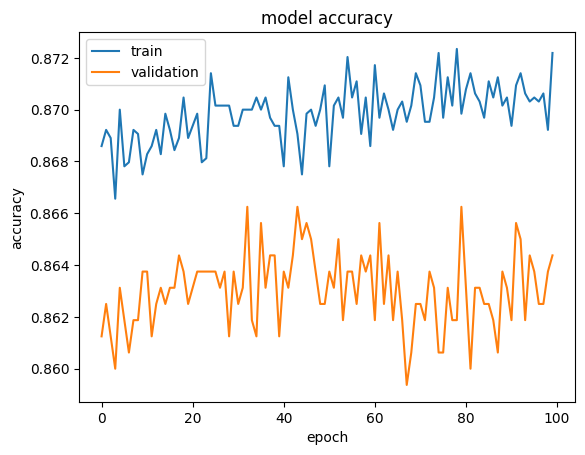

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

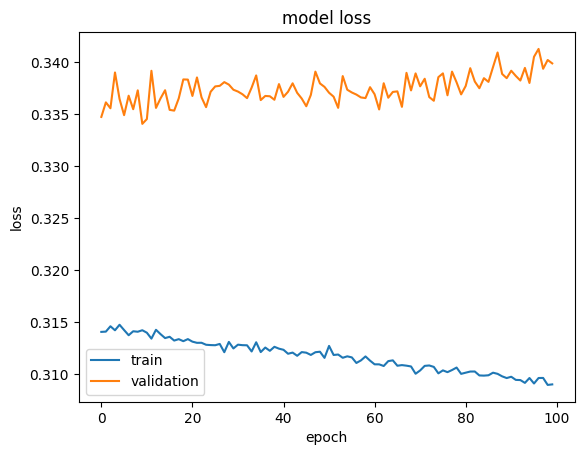

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])